In [1]:
from pathlib import Path

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sci
from matplotlib.ticker import MultipleLocator
import matplotlib.transforms as mtransforms
import string

from glacierData import glacierData
from utils import hist2, weighted_quantile

plt.style.use('default')

In [2]:
gd = glacierData()
gd.calc_response_time()
gd.calc_diseq()
d = gd.rgi

/Users/drotto/src/USGS/glacier-diseq/pub/thickness.py:9: UserWarning: Unpickling a shapely <2.0 geometry object. Please save the pickle again; shapely 2.1 will not have this compatibility.
  f_geom = pickle.load(f)


22
22
22 22
22
22
22 22
22
22
22 22
22
22
22 22
[Text(0, -0.05, '−0.05'), Text(0, 0.0, ''), Text(0, 0.05, '0.05'), Text(0, 0.10000000000000002, '0.10'), Text(0, 0.15000000000000002, '0.15')]
[Text(0, -0.2, '−0.2'), Text(0, 0.0, ''), Text(0, 0.2, '0.2'), Text(0, 0.4000000000000001, '0.4'), Text(0, 0.6000000000000001, '0.6'), Text(0, 0.8, '0.8'), Text(0, 1.0000000000000002, '1.0'), Text(0, 1.2000000000000002, '1.2')]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.05]
[0.00160485 0.00160485 0.00303138 0.00552782 0.00838088 0.0160485
 0.02068474 0.03281027 0.04297432 0.05402996 0.06312411 0.07970756
 0.08452211 0.08773181 0.10324536 0.09896576 0.11251783 0.09700428
 0.07043509 0.0171184  0.00053495 0.        ]


/var/folders/bb/wssqxcxj4tgg0s9fdw74731m0000gn/T/ipykernel_44570/2293528899.py:57: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(wspace=0.35, bottom=0.15)
/var/folders/bb/wssqxcxj4tgg0s9fdw74731m0000gn/T/ipykernel_44570/2293528899.py:60: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/bb/wssqxcxj4tgg0s9fdw74731m0000gn/T/ipykernel_44570/2293528899.py:67: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(labels)


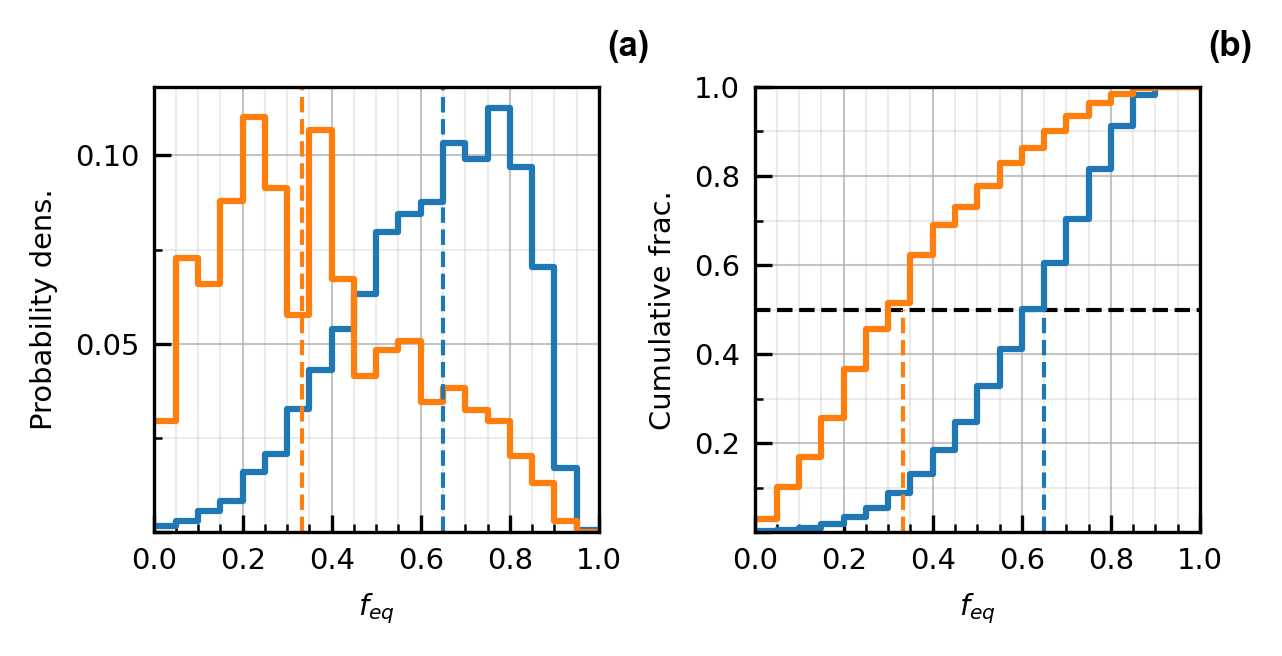

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(4.5, 2.15), sharex=True, dpi=300, layout='constrained')
ax[1].axhline(0.5, c='black', lw=1, ls='--')

x = d['feq'].dropna()
idx = x.index
x = x.to_numpy()
area = d.loc[idx, 'Area'].to_numpy()
binfreq = 0.05
uwcdf, bins = hist2(x, binfreq=binfreq, cumsum=True, from_zero=True)
awcdf, bins = hist2(x, area=area, binfreq=binfreq, cumsum=True, from_zero=True)
uwpdf, bins = hist2(x, binfreq=binfreq, cumsum=False, from_zero=True)
awpdf, bins = hist2(x, area=area, binfreq=binfreq, cumsum=False, from_zero=True)
ax[1].step(bins, uwcdf)
ax[1].step(bins, awcdf)
ax[0].step(bins, uwpdf)
ax[0].step(bins, awpdf)

# median lines
uwxmax = np.median(x)
awxmax = weighted_quantile(x, [0.5], sample_weight=area)
ax[1].plot([uwxmax, uwxmax], [0, 0.5], ls='--', c='tab:blue', lw=1)
ax[1].plot([awxmax, awxmax], [0, 0.5], ls='--', c='tab:orange', lw=1)
ax[0].axvline(awxmax, ls='--', c='tab:orange', lw=1)
ax[0].axvline(uwxmax, ls='--', c='tab:blue', lw=1)


for axis in ax.ravel():
    axis.xaxis.set_major_locator(MultipleLocator(0.2))
    axis.xaxis.set_minor_locator(MultipleLocator(0.05))
    axis.grid(which='minor', axis='both', lw=0.5, alpha=0.25)
    axis.grid(which='major', axis='both', lw=0.5, alpha=0.75)
    axis.set_axisbelow(True)    
    axis.tick_params(axis="both", which='both', direction="in", left="off", labelleft="on", length=2, labelsize='x-small')
    axis.tick_params(axis='both', which='major', length=4)
    axis.set_box_aspect(1)
    axis.set_xlabel('$f_{eq}$', fontsize='x-small')
ax[1].set_ylim([0, 1])
ax[1].set_xlim(0, 1)
ax[1].yaxis.set_major_locator(MultipleLocator(0.2))
ax[1].yaxis.set_minor_locator(MultipleLocator(0.1))
ax[1].set_xticks(np.arange(0, 1.2, 0.2))
ax[0].set_ylim([0, None])
ax[0].yaxis.set_major_locator(MultipleLocator(0.05))
ax[0].yaxis.set_minor_locator(MultipleLocator(0.025))

ax[0].set_ylabel('Probability dens.', fontsize='x-small')
ax[1].set_ylabel('Cumulative frac.', fontsize='x-small')

# label subplots
sp_labels = ['(' + letter + ')' for letter in string.ascii_lowercase]
for i, axis in enumerate(ax):
    # label physical distance in and down:
    trans = mpl.transforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
    #axis.text(0.975, 1.2, sp_labels[i], transform=axis.transAxes + trans,
    axis.text(0.925, 1.175, sp_labels[i], transform=axis.transAxes + trans,
              verticalalignment='top', fontsize='small', font='Arial', fontweight='bold')
plt.subplots_adjust(wspace=0.35, bottom=0.15)
    
# Important to render initial ytick labels
fig.show()
fig.canvas.draw()
    
for axis in ax:
    labels = [item for item in axis.get_yticklabels()]
    labels[1].set_text('')
    print(labels)
    axis.set_yticklabels(labels)
    
print(bins)
print(uwpdf)

plt.savefig(Path('Fig7.png'))